估值因子可以辅助投资者解决”买什么，什么时候买和什么时候卖“的困惑，实现低买高卖。

**原始研报**： 国盛证券*专题研究*择时雷达六面图 - 估值面章节

**研报解读**： [量化-研报复现] 通过指数估值因子分析市场状态

**代码作者**： Spectator

**结构说明**：

第一部分: 安装并导入依赖包;

第二部分：解析数据构建估值因子。

**结果说明**：

1.   代码复现的数据来自公开数据源，所以复现结果可能和原文有差别；
2.   部分因子的数据缺少公开数据源可调用，尝试使用了类似数据进行代替。


# 第一部分: 安装并导入依赖包
1.安装依赖包

In [ ]:
pip install akshare

2.导入依赖包

In [2]:
import akshare as ak
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 第二部分：解析数据构建估值因子

3.解析中证800的历史收盘价数据

<AxesSubplot:xlabel='date'>

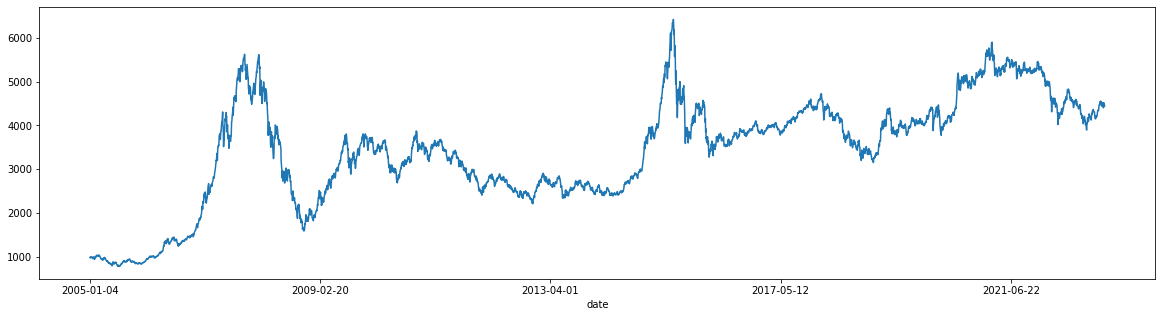

In [3]:
zz800 = ak.stock_zh_index_daily(symbol="sh000906")[["date","close"]]
zz800 = zz800.set_index("date")
zz800.index = zz800.index.astype(str)
zz800["close"].plot(figsize=(20,5))

4.构建中证800成分股 PE_ttm 中位数因子

因子计算方式： 使用中证 800 的成分股 PE_ttm(动态市盈率) 的中位数计算，历史底部区域为 PE=20 倍。 当指标处于底部区域时，平均未来一个季度股市预期表现较好。

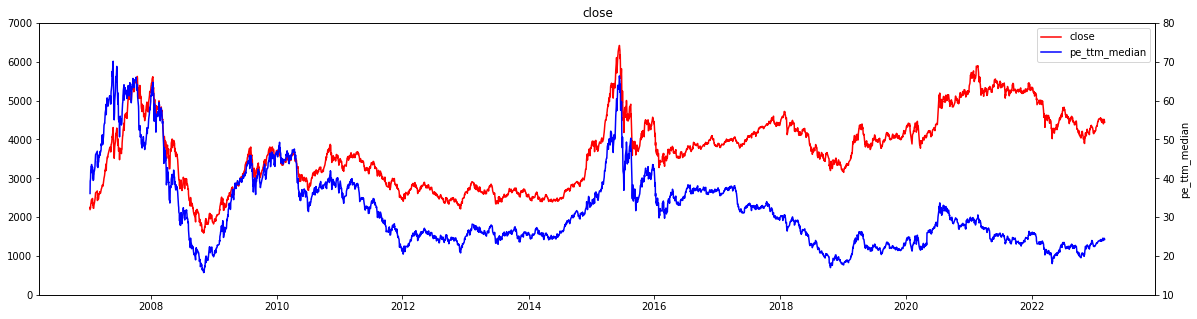

In [4]:
stock_index_pe_lg_df = ak.stock_index_pe_lg(symbol="中证800")[["日期","滚动市盈率中位数"]]
stock_index_pe_lg_df = stock_index_pe_lg_df.rename(columns={"日期":"date","滚动市盈率中位数":"pe_ttm_median"})
stock_index_pe_lg_df = stock_index_pe_lg_df.set_index("date")
stock_index_pe_lg_df.index = stock_index_pe_lg_df.index.astype(str)

stock_index_pe_lg_df = pd.merge(stock_index_pe_lg_df, zz800,right_on='date',left_on='date')
stock_index_pe_lg_df.index = pd.to_datetime(stock_index_pe_lg_df.index)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(stock_index_pe_lg_df["close"], 'r', label = 'close')
ax1.legend(loc=0)
ax1.set_title("close")
ax1.set_ylim(0,7000)

ax2 = ax1.twinx()  # this is the important function
line2 = ax2.plot(stock_index_pe_lg_df["pe_ttm_median"], 'b', label = 'pe_ttm_median')
ax2.set_ylabel('pe_ttm_median')
ax2.set_ylim(10, 80)

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)


5.构建中证800PB因子

因子计算方式： 1.4倍的PB（市净率）是底部区域。当指标处于底部区域时，平均未来一个季度股市预期表现较好。

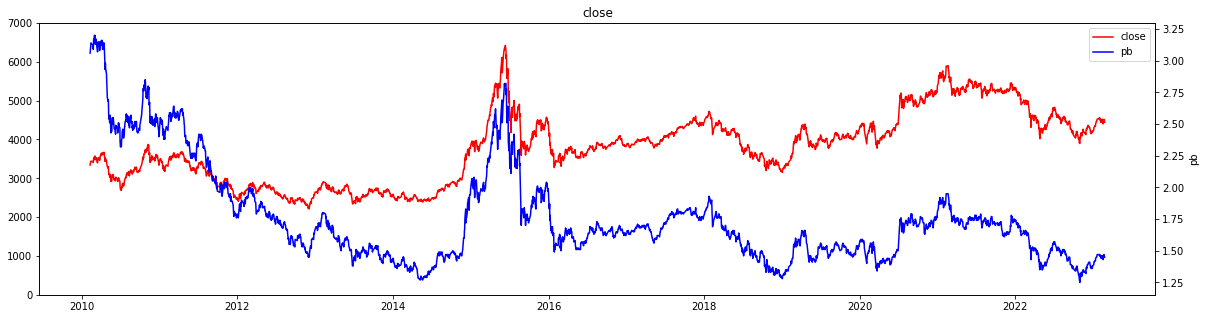

In [5]:
stock_index_pb_lg = ak.stock_index_pb_lg(symbol="中证800")
stock_index_pb_lg = stock_index_pb_lg.rename(columns={"日期":"date","市净率":"pb"})
stock_index_pb_lg = stock_index_pb_lg.set_index("date")
stock_index_pb_lg.index = stock_index_pb_lg.index.astype(str)
stock_index_pb_lg = pd.merge(stock_index_pb_lg, zz800,right_on='date',left_on='date')
stock_index_pb_lg.index = pd.to_datetime(stock_index_pb_lg.index)

stock_index_pb_lg = stock_index_pb_lg.iloc[750:]
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(stock_index_pb_lg["close"], 'r', label = 'close')
ax1.legend(loc=0)
ax1.set_title("close")
ax1.set_ylim(0,7000)

ax2 = ax1.twinx()  # this is the important function
line2 = ax2.plot(stock_index_pb_lg["pb"], 'b', label = 'pb')
ax2.set_ylabel('pb')
#ax2.set_ylim(1.0, 80)

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)


6.构建中证800股息率因子

因子计算方式： 当股息率高于2.5%是底部区域，低于1.5%是顶部区域。当指标处于底部区域时，平均未来一个季度股市预期表现较好。由于缺少中证800股息率的股息率数据，使用上证A股和深证A股的股息率均值进行代替。

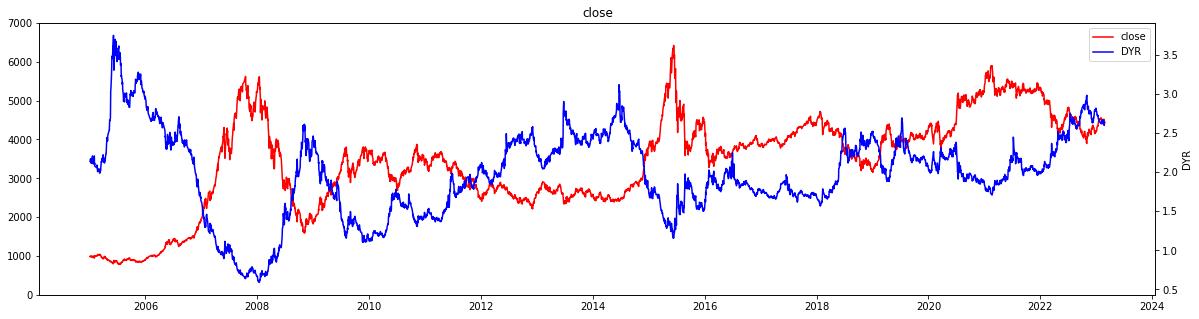

In [6]:
shgxl = ak.stock_a_gxl_lg(symbol="上证A股")
shgxl = shgxl.rename(columns={"日期":"date","股息率":"DYR_sh"})
shgxl = shgxl.set_index("date")
shgxl.index = shgxl.index.astype(str)

szgxl = ak.stock_a_gxl_lg(symbol="深证A股")
szgxl = szgxl.rename(columns={"日期":"date","股息率":"DYR_sz"})
szgxl = szgxl.set_index("date")
szgxl.index = szgxl.index.astype(str)

gxl = pd.merge(szgxl, shgxl,right_on='date',left_on='date')
gxl["DYR"] = (gxl["DYR_sh"] + gxl["DYR_sz"])/2

gxl = pd.merge(gxl, zz800,right_on='date',left_on='date')
gxl.index = pd.to_datetime(gxl.index)


fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gxl["close"], 'r', label = 'close')
ax1.legend(loc=0)
ax1.set_title("close")
ax1.set_ylim(0,7000)

ax2 = ax1.twinx()  # this is the important function
line2 = ax2.plot(gxl["DYR"], 'b', label = 'DYR')
ax2.set_ylabel('DYR')
#ax2.set_ylim(1.0, 80)

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)


7.构建中证800股权风险溢价因子

因子计算方式： 使用中证800成分股1/PE_ttm和十年国债收益率的比值，滚动5年进行均值方差标准化处理。当指标位于1.5以上或-1.5以下时，预期市场未来分别为上涨或下跌，平均持续一年左右。

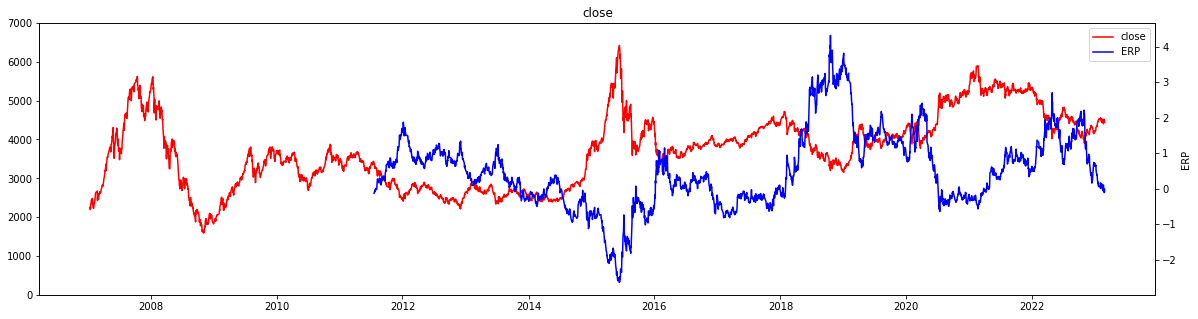

In [7]:
stock_index_pe_lg_df = ak.stock_index_pe_lg(symbol="中证800")[["日期","滚动市盈率中位数"]]
stock_index_pe_lg_df = stock_index_pe_lg_df.rename(columns={"日期":"date","滚动市盈率中位数":"pe_ttm_median"})
stock_index_pe_lg_df = stock_index_pe_lg_df.set_index("date")
stock_index_pe_lg_df.index = stock_index_pe_lg_df.index.astype(str)

gz_data = ak.bond_zh_us_rate()[["日期","中国国债收益率2年","中国国债收益率5年","中国国债收益率10年"]]
gz_data = gz_data.rename(columns={"日期":"date","中国国债收益率2年":"2y","中国国债收益率5年":"5y","中国国债收益率10年":"10y"})
gz_data = gz_data.set_index("date")
gz_data.index = gz_data.index.astype(str)

erp = pd.merge(stock_index_pe_lg_df,gz_data,right_on='date',left_on='date')


erp.index = pd.to_datetime(erp.index)
erp["ERP"] = 100 / (erp["10y"] * erp["pe_ttm_median"])
erp["ERP"] = erp["ERP"].rolling(5*220).apply(lambda x:(x[-1]- x.mean())/x.std())

erp.index = erp.index.astype(str)
erp = pd.merge(erp, zz800,right_on='date',left_on='date')
erp.index = pd.to_datetime(erp.index)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(erp["close"], 'r', label = 'close')
ax1.legend(loc=0)
ax1.set_title("close")
ax1.set_ylim(0,7000)

ax2 = ax1.twinx()  # this is the important function
line2 = ax2.plot(erp["ERP"], 'b', label = 'ERP')
ax2.set_ylabel('ERP')
#ax2.set_ylim(1.0, 80)

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)

8.构建中证800成分股的AIAE因子

因子计算方式：AIAE 用来描述资金配臵股票资产的比例，AIAE=股票市值/（股票市值+债券市值 +现金），低于15%为底部区域。当指标处于底部区域时，平均未来一个季度股市预期表现较好。由于未找到公开的债权市值数据源，所以计算公式中未包含债权数据，即AIAE=股票市值/（股票市值+货币和准货币(M2)）

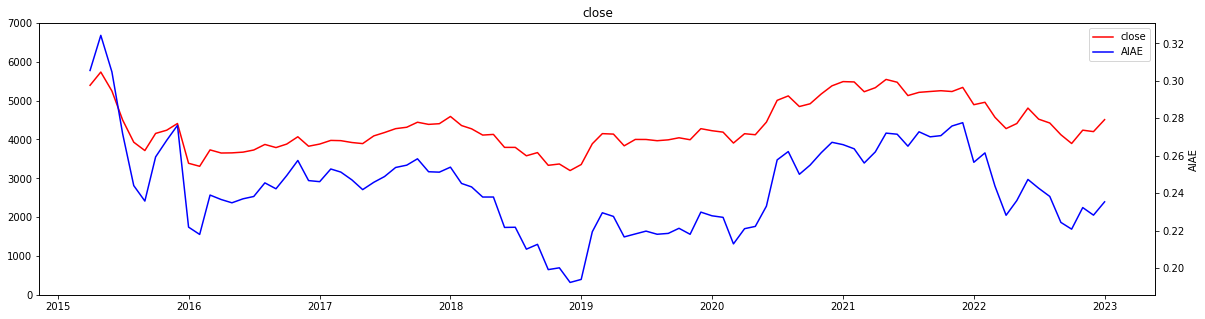

In [8]:
stock_account_statistics_em_df = ak.stock_account_statistics_em()[["数据日期","沪深总市值"]].iloc[::-1]
stock_account_statistics_em_df = stock_account_statistics_em_df.rename(columns={"数据日期":"date","沪深总市值":"total_stock_value"})
stock_account_statistics_em_df = stock_account_statistics_em_df.set_index("date")
stock_account_statistics_em_df.index = stock_account_statistics_em_df.index.astype(str)

macro_china_money_supply_df = ak.macro_china_money_supply()[["月份",  "货币和准货币(M2)-数量(亿元)"]].iloc[::-1]
macro_china_money_supply_df = macro_china_money_supply_df.rename(columns={"月份":"date","货币和准货币(M2)-数量(亿元)":"total_m2_value"})
macro_china_money_supply_df.date = macro_china_money_supply_df.date.apply(lambda x: f"{x[:4]}-{x[5:7]}")
macro_china_money_supply_df = macro_china_money_supply_df.set_index("date")
macro_china_money_supply_df.index = macro_china_money_supply_df.index.astype(str)

aiae = pd.merge(macro_china_money_supply_df,stock_account_statistics_em_df,right_on='date',left_on='date')
aiae["AIAE"] = aiae["total_stock_value"] / (aiae["total_stock_value"]  + aiae["total_m2_value"] )
zz800_m = zz800
zz800_m.index = pd.to_datetime(zz800_m.index)
zz800_m = zz800.loc[zz800.groupby(zz800.index.to_period('M')).apply(lambda x: x.index.max())]
zz800_m.index = zz800_m.index.astype(str)
zz800_m.index = [str(i)[:-3] for i in zz800_m.index]
zz800_m.index.name = "date"

aiae = pd.merge(aiae,zz800_m,right_on='date',left_on='date')
aiae.index = pd.to_datetime(aiae.index)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(aiae["close"], 'r', label = 'close')
ax1.legend(loc=0)
ax1.set_title("close")
ax1.set_ylim(0,7000)

ax2 = ax1.twinx()  # this is the important function
line2 = ax2.plot(aiae["AIAE"], 'b', label = 'AIAE')
ax2.set_ylabel('AIAE')
#ax2.set_ylim(1.0, 80)

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)

9.构建中证800成分股的DCF估值因子

因子计算方式： 基于中证 800 ROE 和分红率得到预期增速，采用二阶段 DCF 模型给出绝对估值，n2 取 25 年为合理估值。

由于未找到公开的债权市值数据源，当前因子未成功复现。